# Introduction to GeoPandas

Spatial data differ from non-spatial data in two ways:
1. The spatial component of the data requires a different representation.
2. The geometric nature of spatial data leads to a set of geometry-based data processing operations that is unique to spatial data.

To address these differences, [GeoPandas](https://geopandas.org/en/stable/index.html) is an extension of Pandas that designed to work with spatial data. It allows one to easily read, write, manipulate, analyze and visualize geospatial data in Python. In this tutorial, we will provide a quick overview of the GeoPandas.

## Reading geographical data

There are unfortunately multiple file formats for storing geographical data. Some popular file formats are:
* [GeoJson](https://geojson.org) with extension `.geojson`
* [ShapeFile](https://en.wikipedia.org/wiki/Shapefile) which involves at least 3 files with extensions `.shp`, `.shx` and `.dbf`.
* [TopoJson](https://github.com/topojson/topojson) with extension `.topojson`.

Fortunately, GeoPandas has good support for all formats above. `geopandas.read_file` provides an automatic way of loading any geographical data as a `geopandas.GeoDataFrame` object.

In [1]:
import geopandas as gpd

url="https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON"
borough_bd = gpd.read_file(url)

In the snippet above, we have loaded New York City borough boundary data directly from an URL. You can also directly download the data from the source [here](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm).

## `GeoSeries` and `GeoDataFrame`

Let us take a look at the `borough_bd` data frame:

In [2]:
borough_bd

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623620725.06,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2,Bronx,1187174784.85,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1,Manhattan,636520830.768,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3,Brooklyn,1934143372.64,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3041418506.76,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


The data looks just like a regular data frame. It has 5 columns: `boro_code`, `boro_name`, `shape_area`, `shape_leng` and `geometry`.  However, the `geometry` column is not a regular column.

In [3]:
borough_bd.geometry

0    MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...
1    MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
2    MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...
3    MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...
4    MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...
Name: geometry, dtype: geometry

The `geometry` column is of type [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries). It contains data describing the _shape_ of a geospatial object.  In this case, each entry of the `geometry` column is a multipolygon (i.e. a set of polygons) that forms the boundary of a borough.  Possible types of shape representation include points/multi-points, lines/multi-lines and polygon/multi-polygons.

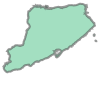

In [4]:
borough_bd.geometry[0]

Because the `geometry` column represents shapes, one can easily compute some common properties of shapes:

In [5]:
borough_bd.geometry[0].area

0.016043560428550402

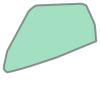

In [6]:
borough_bd.geometry[0].convex_hull

Because the presence of a `GeoSeries` column in the data frame, the entire data frame of type [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame). Typically, a data frame only has one column representing spatial data, but it is possible to have two or more columns containing spatial data. However, only one of the spatial columns should be active.  Active spatial columns can be accessed via the `.geometry` attribute.

To learn more about `GeoSeries` and `GeoDataFrame`, please see [GeoPandas's user guide](https://geopandas.org/en/stable/docs/user_guide/data_structures.html).

## Coordinate reference systems (CRS)

Each `GeoSeries` and `GeoDataFrame` contain specifications of something called a "Coordinate Reference System" or CRS for short. CRS encodes information such as axis, unit and projection mode that allows python to interpret the geometry data stored in the column as locations/regions on earth.

In [7]:
borough_bd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

For example, the CRS of `borough_bd` tells us the geospatial data is encoded in latitudes and longitudes. Latitude has the range of [-90, 90] and longitude has the range [-180, 180]. It sometimes necessary to change CRS associated with a data frame, which will reproject the geospatial data.

In [8]:
borough_bd = borough_bd.to_crs("EPSG:3857")
borough_bd

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623620725.06,325917.353702,"MULTIPOLYGON (((-8243264.851 4948597.836, -824..."
1,2,Bronx,1187174784.85,463179.772813,"MULTIPOLYGON (((-8226155.130 4982269.949, -822..."
2,1,Manhattan,636520830.768,357564.316391,"MULTIPOLYGON (((-8238858.864 4965915.024, -823..."
3,3,Brooklyn,1934143372.64,728197.541089,"MULTIPOLYGON (((-8222422.129 4951155.999, -822..."
4,4,Queens,3041418506.76,888199.731579,"MULTIPOLYGON (((-8218322.444 4952130.879, -821..."


In [9]:
borough_bd.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In the example above, the function `to_crs` projects the data stored in the geometry column using the "EPSG:3857" coordinate system. EPSG stands for "European Petroleum Survey Group". The EPSG registry is a standard database of CRSs. It assigns a unique EPSG code to each coordinate reference system. "EPSG:3857" is the the [web Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection) often used in web-based mapping tools like Google map, and "EPSG:4326" uses the longitude/latitude system (i.e. [WGS84](https://en.wikipedia.org/wiki/WGS_84)) often used in GPS devices.

It is very important to use the same CRS when working with multiple datasets containing geospatial data.

## Useful functions

We have already seen the `area` and `convex_hull` functions.  These are examples of geographical operations/computations we can do on a single series/frame. 

### Buffer
Another very useful function is `buffer` which computes the offset shape of a given geometry.  For example, given the borough boundary of Manhattan:

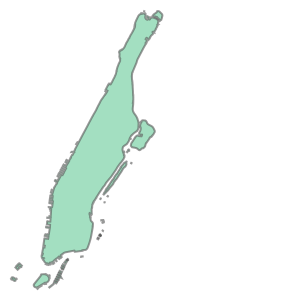

In [10]:
borough_bd.geometry[2]

We can use `buffer` to get a shape that is within 1 km of Manhattan.

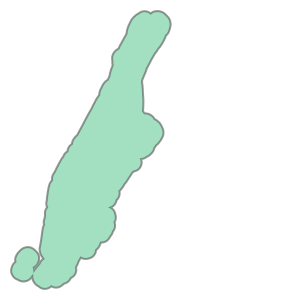

In [11]:
borough_bd.geometry[2].buffer(1000)

Note the unit of the buffer argument (i.e. 1000) is based on the specification of CRS, which is meter in this case.

### Envelope
Another useful function is `envelope`. It will extract an axis-aligned bounding box of the given shape.

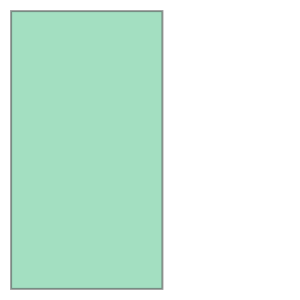

In [12]:
borough_bd.geometry[2].envelope

### Overlay

When there are two or more datasets containing geospatial information, it is common that the shapes they encode overlaps. The `overlay` function allows us to compute union, intersection differences of shapes. Let us see an example.

In [13]:
borough_inland = gpd.GeoDataFrame({"geometry": borough_bd.buffer(-1000)})
borough_inland

,geometry
0,"MULTIPOLYGON (((-8265063.127 4939663.162, -826..."
1,"MULTIPOLYGON (((-8229136.471 4984490.475, -822..."
2,"POLYGON ((-8238460.883 4970124.035, -8238393.2..."
3,"MULTIPOLYGON (((-8240806.272 4958878.822, -824..."
4,"MULTIPOLYGON (((-8231431.469 4975421.827, -823..."


First, we created a second `GeoDataFrame` that represents the inland area of the boroughs. Here, we define a location as inland if it is over 1km away from the borough boundary.  Similarly, we can define a location as coast if it is more than 1km away from the borough boundary.  To compute the coast region, we take the difference between the borough's original region and its inland region.

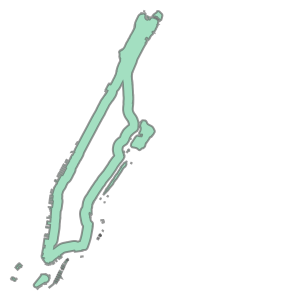

In [14]:
borough_coast = borough_bd.overlay(borough_inland, how="difference")
borough_coast.geometry[2]

### Dissolve

One of the very useful capabilities of Pandas is aggregation. For example, we can group the data by the distinct values in one or more columns and compute some form of aggregation of the other columns based on the grouping. GeoPandas also provides such capability via its `disssolve` method.

Let's first add a column named `is_island` to our borough boundary dataset to indicate if a borough is an island or not.  Out of the five boroughs, only Manhattan and Staten Island are islands.

In [15]:
borough_bd.boro_name

0    Staten Island
1            Bronx
2        Manhattan
3         Brooklyn
4           Queens
Name: boro_name, dtype: object

In [16]:
borough_bd["is_island"] = [True, False, True, False, False]
borough_bd

,boro_code,boro_name,shape_area,shape_leng,geometry,is_island
0,5,Staten Island,1623620725.06,325917.353702,"MULTIPOLYGON (((-8243264.851 4948597.836, -824...",True
1,2,Bronx,1187174784.85,463179.772813,"MULTIPOLYGON (((-8226155.130 4982269.949, -822...",False
2,1,Manhattan,636520830.768,357564.316391,"MULTIPOLYGON (((-8238858.864 4965915.024, -823...",True
3,3,Brooklyn,1934143372.64,728197.541089,"MULTIPOLYGON (((-8222422.129 4951155.999, -822...",False
4,4,Queens,3041418506.76,888199.731579,"MULTIPOLYGON (((-8218322.444 4952130.879, -821...",False


Now, imagine that we want to group the dataset by the `is_island` column and compute some aggregation of the other columns.  For example, we may want to compute the total area of island vs non-island boroughs. This can be done with the `dissolve` method.

In [17]:
# Ensure numerical columns are in float.
borough_bd = borough_bd.astype({"shape_area": float, "shape_leng": float})

# Dissolve only selected columns.
by_island = borough_bd[["is_island","geometry", "shape_area", "shape_leng"]]\
    .dissolve(by="is_island", aggfunc="sum")
by_island

,geometry,shape_area,shape_leng
is_island,,,
False,"MULTIPOLYGON (((-8222837.086 4950877.538, -822...",6.162737e+09,2.079577e+06
True,"MULTIPOLYGON (((-8243132.196 4948519.542, -824...",2.260142e+09,6.834817e+05


In addition to compute the aggregated `shape_area` and `shape_leng` columns, `dissolve` methods also aggregated the geometry using union operation.  That means the geometry of island boroughs are now merged into a single geometry. Similarly, the geometry of non-island boroughs are also merged into a single geometry.

In [18]:
by_island.loc[False, "geometry"]

### Spatial join

Lastly, it is often necessary to merge two geographical dataset together based on some kind of geographical relationships. GeoPandas provides `sjoin` (spatial join) for this purpose.  To illustrate this capability, we first need a second dataset.

In [19]:
subway_lines = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/3qz8-muuu?method=export&format=GeoJSON")
subway_lines = subway_lines.to_crs("EPSG:3857")
subway_lines

,name,url,rt_symbol,objectid,id,shape_len,geometry
0,G,http://web.mta.info/nyct/service/,G,753,2000393,2438.20024902,"LINESTRING (-8237071.834 4965285.580, -8237004..."
1,G,http://web.mta.info/nyct/service/,G,754,2000394,3872.83441063,"LINESTRING (-8235368.666 4962310.184, -8235377..."
2,Q,http://web.mta.info/nyct/service/,N,755,2000469,1843.36633108,"LINESTRING (-8234954.663 4949997.756, -8235031..."
3,M,http://web.mta.info/nyct/service/,B,756,2000294,1919.5592029,"LINESTRING (-8229198.018 4975873.004, -8229187..."
4,M,http://web.mta.info/nyct/service/,B,757,2000296,2385.69853589,"LINESTRING (-8228007.267 4976443.278, -8227517..."
...,...,...,...,...,...,...,...
737,M,http://web.mta.info/nyct/service/,B,1490,0,4198.26264126,"LINESTRING (-8231088.700 4968242.968, -8231205..."
738,Q,http://web.mta.info/nyct/service/,N,1718,0,3779.62004576,"LINESTRING (-8233007.174 4978299.664, -8232952..."
739,Q,http://web.mta.info/nyct/service/,N,1873,0,2797.02138975,"LINESTRING (-8235360.158 4977925.029, -8235266..."
740,N-W,http://web.mta.info/nyct/service/,N,1809,0,2194.71893052,"LINESTRING (-8230978.261 4975638.418, -8230950..."


Here, we have retrieved the subway line data from https://data.cityofnewyork.us/Transportation/Subway-Lines/3qz8-muuu. Each entry contains the geometry of a single subway line.  Note that we have changed its CRS so it is consistent with the `borough_bd` dataset.

It is common to ask which set of subway lines go through each borough. This can be answered using spatial join.

In [20]:
subway_borough = subway_lines.sjoin(borough_bd, how="inner", predicate="intersects")
subway_borough

,name,url,rt_symbol,objectid,id,shape_len,geometry,index_right,boro_code,boro_name,shape_area,shape_leng,is_island
0,G,http://web.mta.info/nyct/service/,G,753,2000393,2438.20024902,"LINESTRING (-8237071.834 4965285.580, -8237004...",3,3,Brooklyn,1.934143e+09,728197.541089,False
1,G,http://web.mta.info/nyct/service/,G,754,2000394,3872.83441063,"LINESTRING (-8235368.666 4962310.184, -8235377...",3,3,Brooklyn,1.934143e+09,728197.541089,False
2,Q,http://web.mta.info/nyct/service/,N,755,2000469,1843.36633108,"LINESTRING (-8234954.663 4949997.756, -8235031...",3,3,Brooklyn,1.934143e+09,728197.541089,False
6,G,http://web.mta.info/nyct/service/,G,759,2000239,2448.06920027,"LINESTRING (-8235983.645 4966479.589, -8235877...",3,3,Brooklyn,1.934143e+09,728197.541089,False
7,G,http://web.mta.info/nyct/service/,G,760,2000238,690.126468476,"LINESTRING (-8235983.623 4966480.831, -8236230...",3,3,Brooklyn,1.934143e+09,728197.541089,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,6,http://web.mta.info/nyct/service/,4,1441,2000156,2394.32041586,"LINESTRING (-8224983.400 4986787.666, -8224969...",1,2,Bronx,1.187175e+09,463179.772813,False
691,5,http://web.mta.info/nyct/service/,4,1447,2000072,4572.96822234,"LINESTRING (-8221540.956 4991564.132, -8220541...",1,2,Bronx,1.187175e+09,463179.772813,False
692,6,http://web.mta.info/nyct/service/,4,1448,2000165,2498.27069337,"LINESTRING (-8219003.985 4989772.315, -8218903...",1,2,Bronx,1.187175e+09,463179.772813,False
693,5,http://web.mta.info/nyct/service/,4,1449,2000052,2015.02394655,"LINESTRING (-8227364.725 4985292.300, -8227157...",1,2,Bronx,1.187175e+09,463179.772813,False


Here, we have created the `subway_borough` data frame that is a _spatial_ inner join of the `subway_lines` data frame and the `borough_bd` data frame. It is a _spatial_ inner join because observations from `subway_lines` and `borough_bd` are joined together by the spatial relationship of their corresponding geometry columns. Such a spatial relationship is defined by the `predicate` argument, which is set to `intersect` in this case. This means that whenever a subway line intersects the region of a borough, we will create a new row in the output data frame that combines the corresponding rows from `subway_lines` and `borough_bd` data frames.

We can now answer the question of which subway lines pass through a given borough using the `subway_borough` data frame.

In [21]:
subway_borough[subway_borough.boro_name == "Brooklyn"].rt_symbol.unique()

array(['G', 'N', 'J', 'A', 'L', 'B', '4', '1'], dtype=object)

For example, `G`, `N`, `J`, `A`, `L`, `B`, `4` and `1` lines all pass through Brooklyn.

[This page](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html) provides more information about spatial join and supported predicates.

## Summary
In this tutorial, we have learned about GeoPandas, which is an extension of Pandas for geospatial data. It is the primary library we will use for reading and analyzing geospatial data. It is also used by many visualization packages including Altair.  Here are some the useful methods we talked about in this doc:

* Data representation
  * `geopandas.GeoSeries` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries)
  * `geopandas.GeoDataFrame` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame)
* Coordinate Reference System (CRS) [doc](https://geopandas.org/en/stable/docs/user_guide/projections.html)
* Useful methods:
  * `area` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html)
  * `convex_hull` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.convex_hull.html)
  * `buffer` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.buffer.html)
  * `envelope` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.envelope.html)
  * `overlay` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.overlay.html#geopandas.GeoDataFrame.overlay)
  * `dissolve` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.dissolve.html)
  * `sjoin` [doc](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.sjoin.html)